In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("categorical_data.csv")

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
import seaborn as sns

c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

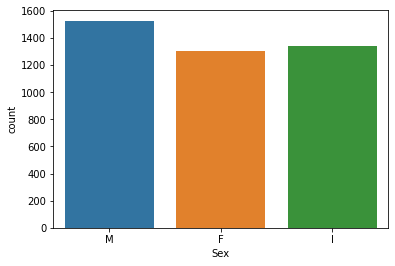

In [5]:
sns.countplot(data.Sex)

In [6]:
from sklearn.preprocessing import LabelEncoder
k=LabelEncoder()
data["Sex"]= k.fit_transform(data['Sex'])


c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

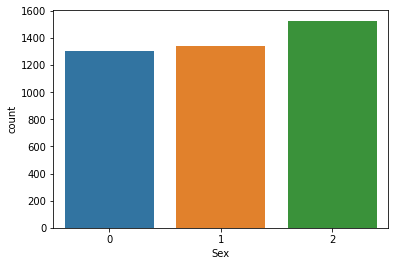

In [7]:
sns.countplot(data.Sex)

In [8]:
y=data.iloc[:,0:1]

In [9]:
y

,Sex
0,2
1,2
2,0
3,2
4,1
...,...
4172,0
4173,2
4174,2
4175,0


In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y=to_categorical(y)

In [12]:
y

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [13]:
x=data.drop("Sex",axis=1)

In [14]:
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
x.shape

(4177, 8)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [17]:
x_train.shape

(2784, 8)

In [18]:
x_test.shape

(1393, 8)

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [20]:
def baseline_model():
    model=Sequential()
    model.add(Dense(30,input_dim=8,activation="tanh"))
    model.add(Dense(20,activation="tanh"))
    model.add(Dense(10,activation="tanh"))
    model.add(Dense(5,activation="tanh"))
    model.add(Dense(3,activation="softmax"))   #for classification in the last layer number of neuron = number of category in target
    #in the last layer non-linearity will also come {  sigmoid,softmax}
    opt=Adam(learning_rate=0.01)
    model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])  #for classification if binary classification
    #loss="binary_crossentropy"  and if multiple classfication loss is ="categorical_crossentropy"
    return model

In [21]:
model=baseline_model()

In [22]:
model.fit(x_train,y_train,epochs=200,batch_size=2120,verbose=1,validation_data=(x_test,y_test))

Epoch 1/200
2/2 [==============================] - 1s 327ms/step - loss: 1.1082 - accuracy: 0.2780 - val_loss: 1.0664 - val_accuracy: 0.3553
Epoch 2/200
2/2 [==============================] - 0s 43ms/step - loss: 1.0581 - accuracy: 0.3797 - val_loss: 1.0607 - val_accuracy: 0.4429
Epoch 3/200
2/2 [==============================] - 0s 41ms/step - loss: 1.0627 - accuracy: 0.4443 - val_loss: 1.0170 - val_accuracy: 0.5255
Epoch 4/200
2/2 [==============================] - 0s 50ms/step - loss: 1.0209 - accuracy: 0.5126 - val_loss: 0.9881 - val_accuracy: 0.5226
Epoch 5/200
2/2 [==============================] - 0s 43ms/step - loss: 0.9892 - accuracy: 0.5101 - val_loss: 0.9607 - val_accuracy: 0.4903
Epoch 6/200
2/2 [==============================] - 0s 42ms/step - loss: 0.9589 - accuracy: 0.4853 - val_loss: 0.9392 - val_accuracy: 0.5298
Epoch 7/200
2/2 [==============================] - 0s 44ms/step - loss: 0.9430 - accuracy: 0.5273 - val_loss: 0.9091 - val_accuracy: 0.5334
Epoch 8/200
2/2 [==

2/2 [==============================] - 0s 42ms/step - loss: 0.8459 - accuracy: 0.5542 - val_loss: 0.8424 - val_accuracy: 0.5506
Epoch 118/200
2/2 [==============================] - 0s 42ms/step - loss: 0.8445 - accuracy: 0.5568 - val_loss: 0.8418 - val_accuracy: 0.5513
Epoch 119/200
2/2 [==============================] - 0s 42ms/step - loss: 0.8433 - accuracy: 0.5550 - val_loss: 0.8414 - val_accuracy: 0.5556
Epoch 120/200
2/2 [==============================] - 0s 40ms/step - loss: 0.8434 - accuracy: 0.5568 - val_loss: 0.8411 - val_accuracy: 0.5542
Epoch 121/200
2/2 [==============================] - 0s 42ms/step - loss: 0.8428 - accuracy: 0.5539 - val_loss: 0.8427 - val_accuracy: 0.5528
Epoch 122/200
2/2 [==============================] - 0s 43ms/step - loss: 0.8433 - accuracy: 0.5499 - val_loss: 0.8418 - val_accuracy: 0.5520
Epoch 123/200
2/2 [==============================] - 0s 45ms/step - loss: 0.8432 - accuracy: 0.5589 - val_loss: 0.8403 - val_accuracy: 0.5607
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 49ms/step - loss: 0.8515 - accuracy: 0.5521 - val_loss: 0.8505 - val_accuracy: 0.5535
Epoch 176/200
2/2 [==============================] - 0s 44ms/step - loss: 0.8432 - accuracy: 0.5578 - val_loss: 0.8830 - val_accuracy: 0.5384
Epoch 177/200
2/2 [==============================] - 0s 44ms/step - loss: 0.8706 - accuracy: 0.5485 - val_loss: 0.8641 - val_accuracy: 0.5578
Epoch 178/200
2/2 [==============================] - 0s 44ms/step - loss: 0.8568 - accuracy: 0.5614 - val_loss: 0.8575 - val_accuracy: 0.5485
Epoch 179/200
2/2 [==============================] - 0s 41ms/step - loss: 0.8498 - accuracy: 0.5557 - val_loss: 0.8446 - val_accuracy: 0.5607
Epoch 180/200
2/2 [==============================] - 0s 46ms/step - loss: 0.8466 - accuracy: 0.5427 - val_loss: 0.8400 - val_accuracy: 0.5564
Epoch 181/200
2/2 [==============================] - 0s 41ms/step - loss: 0.8434 - accuracy: 0.5629 - val_loss: 0.8395 - val_accuracy: 0.5513
Epoch 

In [23]:
yp=model.predict(x_test)

In [24]:
yp

array([[0.4703025 , 0.08593804, 0.4437595 ],
       [0.2304483 , 0.51640344, 0.25314823],
       [0.5241133 , 0.01414536, 0.46174133],
       ...,
       [0.45567733, 0.04665841, 0.49766433],
       [0.2522662 , 0.3529508 , 0.394783  ],
       [0.22374633, 0.5278534 , 0.24840024]], dtype=float32)